## Overview

Loss functions are crucial components in both machine learning as well as deeplearning models as they quantify how well a model performs by measuring the difference between predicted and actual values. This guide summarizes the most commonly used loss functions, their characteristics, and appropriate use cases.

## Loss Function Types

### 1. L1 Loss (Mean Absolute Error)
- **Description**: Measures the absolute difference between predictions and targets
- **Characteristics**: Robust to outliers, not differentiable at zero
- **Use Case**: Regression problems where outliers should have less influence

### 2. L2 Loss (Mean Squared Error)
- **Description**: Measures the squared difference between predictions and targets
- **Characteristics**: Differentiable everywhere, sensitive to outliers
- **Use Case**: Regression problems where large errors should be penalized more heavily

### 3. Huber Loss
- **Description**: Combines the best properties of L1 and L2 loss
- **Characteristics**: Behaves like L2 for small errors and like L1 for large errors
- **Use Case**: Regression problems requiring robustness to outliers with differentiable properties

### 4. Hinge Loss
- **Description**: Measures the margin violation in classification tasks
- **Characteristics**: Encourages correct classifications with at least a specified margin
- **Use Case**: Support Vector Machines (SVMs) and margin-based classifiers

### 5. Binary Cross-Entropy
- **Description**: Measures the performance of probabilistic binary classification models
- **Characteristics**: Works with probability outputs between 0 and 1
- **Use Case**: Binary classification with probability outputs

### 6. Sigmoid Cross-Entropy
- **Description**: Combines sigmoid activation with cross-entropy
- **Characteristics**: Works with raw logit outputs (pre-sigmoid)
- **Use Case**: Binary classification with logit outputs

### 7. Softmax Cross-Entropy
- **Description**: Combines softmax activation with cross-entropy
- **Characteristics**: Handles multiple class probabilities that sum to 1
- **Use Case**: Multi-class classification problems

### 8. Focal Loss
- **Description**: Modified cross-entropy that down-weights well-classified examples
- **Characteristics**: Addresses class imbalance by focusing on hard examples
- **Use Case**: Highly imbalanced classification problems

### 9. KL Divergence
- **Description**: Measures the difference between two probability distributions
- **Characteristics**: Asymmetric measure, used in variational methods
- **Use Case**: Distribution matching, VAEs, probability density estimation

### 10. Dice Loss
- **Description**: Based on F1 score, measures overlap between predicted and target regions
- **Characteristics**: Range between 0 and 1, focuses on region overlap
- **Use Case**: Image segmentation, especially in medical imaging

## Choosing the Right Loss Function

| Problem Type | Recommended Loss Functions |
|--------------|----------------------------|
| Regression | L1, L2, Huber |
| Binary Classification | BCE, Sigmoid-CE, Hinge |
| Multi-class Classification | Softmax-CE |
| Imbalanced Classification | Focal Loss |
| Image Segmentation | Dice Loss |
| Distribution Matching | KL Divergence |

## Implementation

For implementation details and code examples, please refer to the accompanying notebook or source code files.

## References

- Deep Learning by Goodfellow, Bengio, and Courville
- PyTorch and TensorFlow documentation
- "Focal Loss for Dense Object Detection" by Lin et al.

In [1]:
## Import Required Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from scipy.special import expit as sigmoid
import seaborn as sns

In [2]:
plt.style.use('ggplot')
sns.set(style="whitegrid")

## 1. L1 and L2 Loss Functions

- L1 Loss (Mean Absolute Error)
- L1 loss function is also known as Least Absolute Deviations (LAD).
- It minimizes the sum of absolute differences between true and predicted values.

- L2 Loss (Mean Squared Error)
- L2 loss function is also known as Least Square Errors (LS).
- It minimizes the sum of squared differences between true and predicted values.

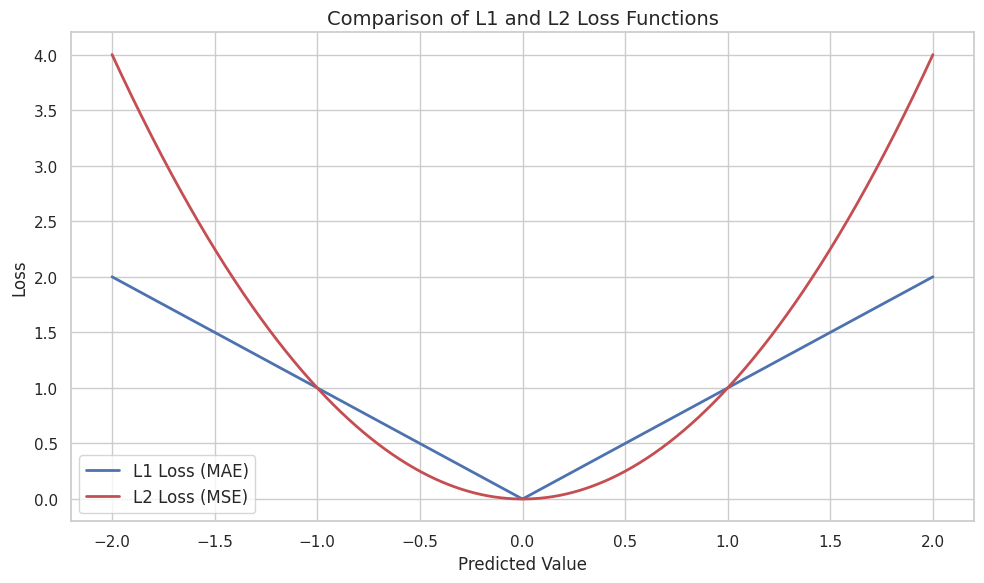

In [3]:
# Create data for visualization
x_guess = np.linspace(-2., 2., 1000)
x_actual = 0  # True value

# Calculate L1 and L2 losses
l1_loss = np.abs(x_guess - x_actual)
l2_loss = np.square(x_guess - x_actual)

# Visualize L1 and L2 losses
plt.figure(figsize=(10, 6))
plt.plot(x_guess, l1_loss, 'b-', linewidth=2, label='L1 Loss (MAE)')
plt.plot(x_guess, l2_loss, 'r-', linewidth=2, label='L2 Loss (MSE)')
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Comparison of L1 and L2 Loss Functions', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Key differences:
 - L1 loss is more robust to outliers as it doesn't square the errors
 - L2 loss penalizes larger errors more heavily due to squaring
 - L1 loss is not differentiable at zero, which can cause issues for gradient-based optimization
 - L2 loss is differentiable everywhere, making it easier for optimization

## 2. Huber Loss

- Huber Loss
- Huber loss combines the best properties of L1 and L2 loss.
- It behaves like L2 for small errors and like L1 for large errors,
- making it less sensitive to outliers than L2 while being differentiable.

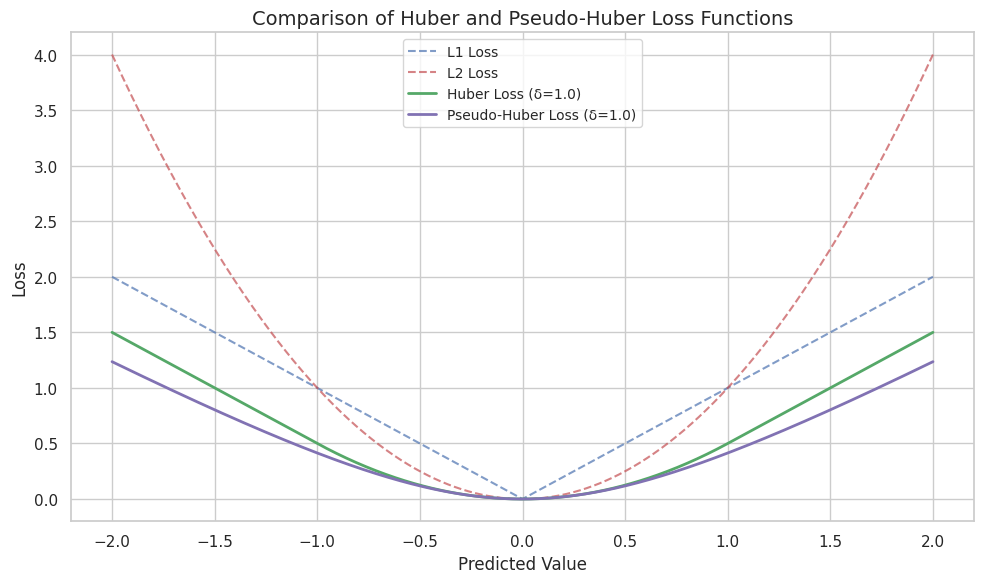

In [4]:
def huber_loss(y_pred, y_true, delta=1.0):
    abs_error = np.abs(y_pred - y_true)
    quadratic = np.minimum(abs_error, delta)
    linear = abs_error - quadratic
    return 0.5 * quadratic**2 + delta * linear

# Pseudo-Huber Loss
# A smooth approximation of Huber loss that ensures differentiability everywhere.
def pseudo_huber_loss(y_pred, y_true, delta=1.0):
    return delta**2 * (np.sqrt(1 + ((y_pred - y_true)/delta)**2) - 1)

# Calculate Huber and Pseudo-Huber losses
huber_losses = huber_loss(x_guess, x_actual)
pseudo_huber_losses = pseudo_huber_loss(x_guess, x_actual)

# Visualize Huber and Pseudo-Huber losses
plt.figure(figsize=(10, 6))
plt.plot(x_guess, l1_loss, 'b--', alpha=0.7, linewidth=1.5, label='L1 Loss')
plt.plot(x_guess, l2_loss, 'r--', alpha=0.7, linewidth=1.5, label='L2 Loss')
plt.plot(x_guess, huber_losses, 'g-', linewidth=2, label='Huber Loss (δ=1.0)')
plt.plot(x_guess, pseudo_huber_losses, 'm-', linewidth=2, label='Pseudo-Huber Loss (δ=1.0)')
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Comparison of Huber and Pseudo-Huber Loss Functions', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

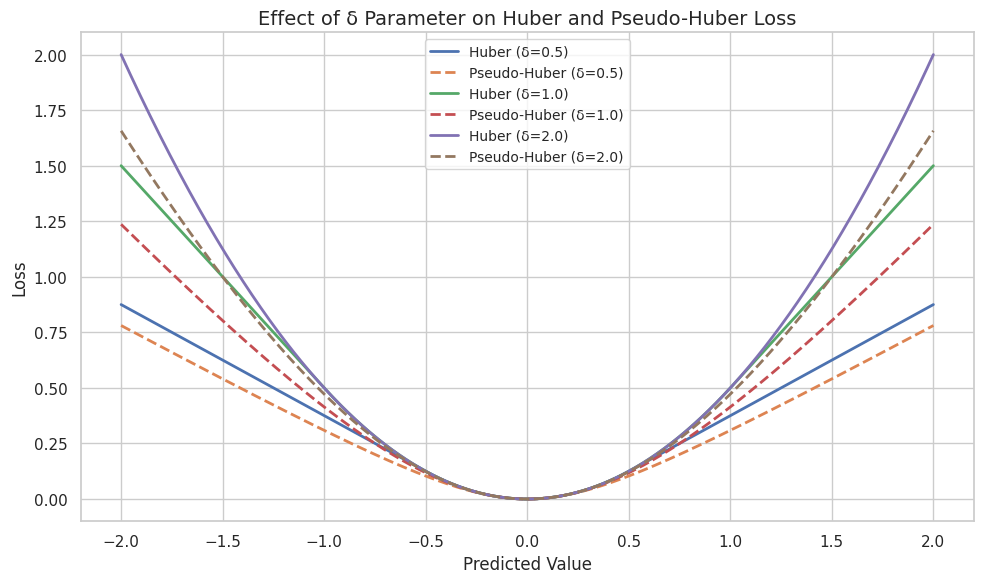

In [5]:
# Effect of delta parameter in Huber loss
deltas = [0.5, 1.0, 2.0]
plt.figure(figsize=(10, 6))

for delta in deltas:
    huber = huber_loss(x_guess, x_actual, delta)
    pseudo = pseudo_huber_loss(x_guess, x_actual, delta)
    plt.plot(x_guess, huber, '-', linewidth=2, label=f'Huber (δ={delta})')
    plt.plot(x_guess, pseudo, '--', linewidth=2, label=f'Pseudo-Huber (δ={delta})')

plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Effect of δ Parameter on Huber and Pseudo-Huber Loss', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Hinge Loss

- Hinge Loss
- Hinge loss is widely used for binary classification problems, especially in SVMs.
- For a true label t ∈ {-1, 1} and prediction y, the hinge loss is max(0, 1 - t·y)
- The goal is to ensure that correct classifications have a margin of at least 1.


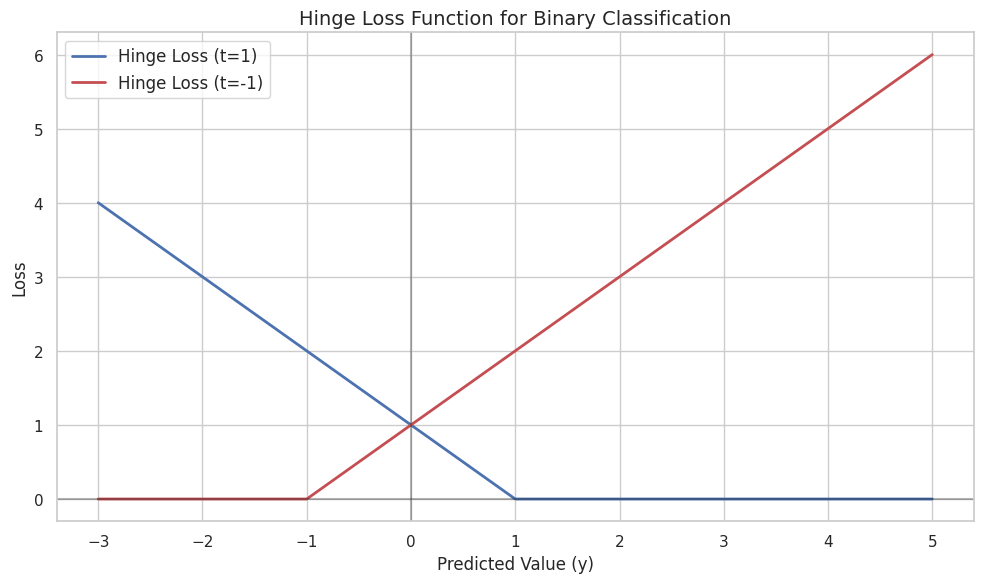

In [6]:
# Generate data
x_guess_hinge = np.linspace(-3., 5., 1000)
x_actual_hinge = np.ones_like(x_guess_hinge)  # True label is 1

# Calculate hinge loss
hinge_loss = np.maximum(0., 1. - (x_guess_hinge * x_actual_hinge))

# Visualize hinge loss
plt.figure(figsize=(10, 6))
plt.plot(x_guess_hinge, hinge_loss, 'b-', linewidth=2, label='Hinge Loss (t=1)')

# Also plot for t=-1 case
x_actual_neg = -np.ones_like(x_guess_hinge)
hinge_loss_neg = np.maximum(0., 1. - (x_guess_hinge * x_actual_neg))
plt.plot(x_guess_hinge, hinge_loss_neg, 'r-', linewidth=2, label='Hinge Loss (t=-1)')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Predicted Value (y)', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Hinge Loss Function for Binary Classification', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


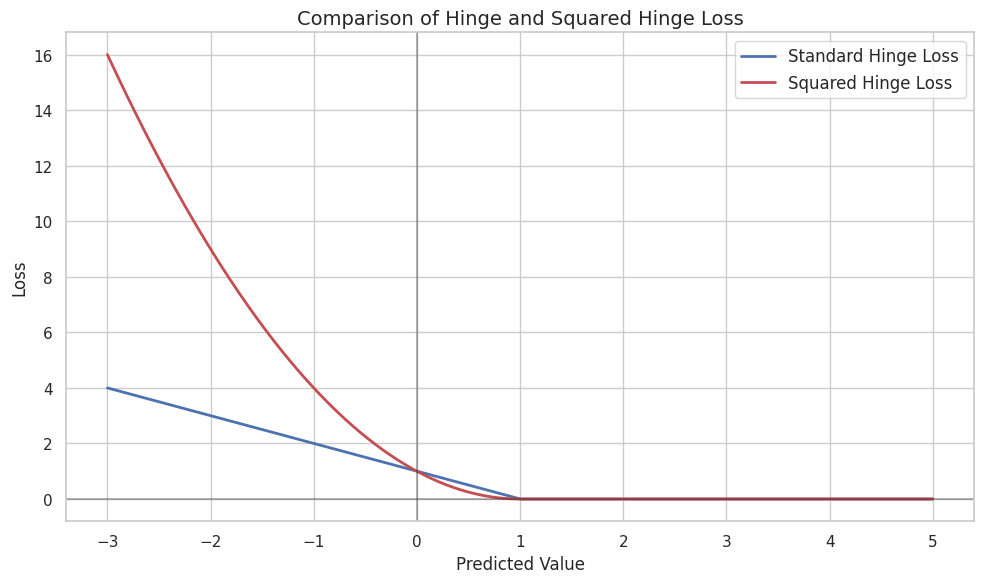

In [7]:
# Quadratic Hinge Loss (Squared Hinge)
# A variant of hinge loss that penalizes violations more strongly
def squared_hinge_loss(y_pred, y_true):
    return np.square(np.maximum(0., 1. - (y_pred * y_true)))

squared_hinge = squared_hinge_loss(x_guess_hinge, x_actual_hinge)

plt.figure(figsize=(10, 6))
plt.plot(x_guess_hinge, hinge_loss, 'b-', linewidth=2, label='Standard Hinge Loss')
plt.plot(x_guess_hinge, squared_hinge, 'r-', linewidth=2, label='Squared Hinge Loss')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Comparison of Hinge and Squared Hinge Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Cross-Entropy Loss

- Binary Cross-Entropy Loss
- Used for binary classification problems where output is a probability.
- If p is the predicted probability and y is the true label (0 or 1),
- the loss is: -[y*log(p) + (1-y)*log(1-p)]

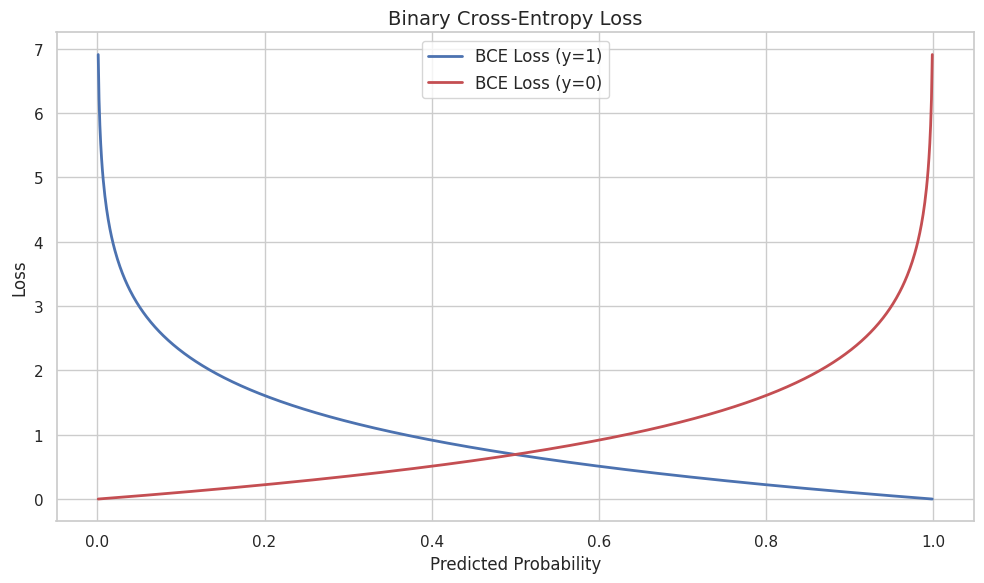

In [8]:
# Generate data
probs = np.linspace(0.001, 0.999, 1000)  # Predicted probabilities
y_true_1 = np.ones_like(probs)  # True label = 1
y_true_0 = np.zeros_like(probs)  # True label = 0

# Calculate binary cross-entropy loss
def binary_cross_entropy(p, y):
    return -1 * (y * np.log(p) + (1 - y) * np.log(1 - p))

bce_true_1 = binary_cross_entropy(probs, y_true_1)
bce_true_0 = binary_cross_entropy(probs, y_true_0)

# Visualize binary cross-entropy loss
plt.figure(figsize=(10, 6))
plt.plot(probs, bce_true_1, 'b-', linewidth=2, label='BCE Loss (y=1)')
plt.plot(probs, bce_true_0, 'r-', linewidth=2, label='BCE Loss (y=0)')
plt.xlabel('Predicted Probability', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Binary Cross-Entropy Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Sigmoid-Cross-Entropy Loss

- Sigmoid-Cross-Entropy Loss
- Combination of sigmoid activation and cross-entropy loss.
- Used when model outputs raw scores (logits) instead of probabilities.


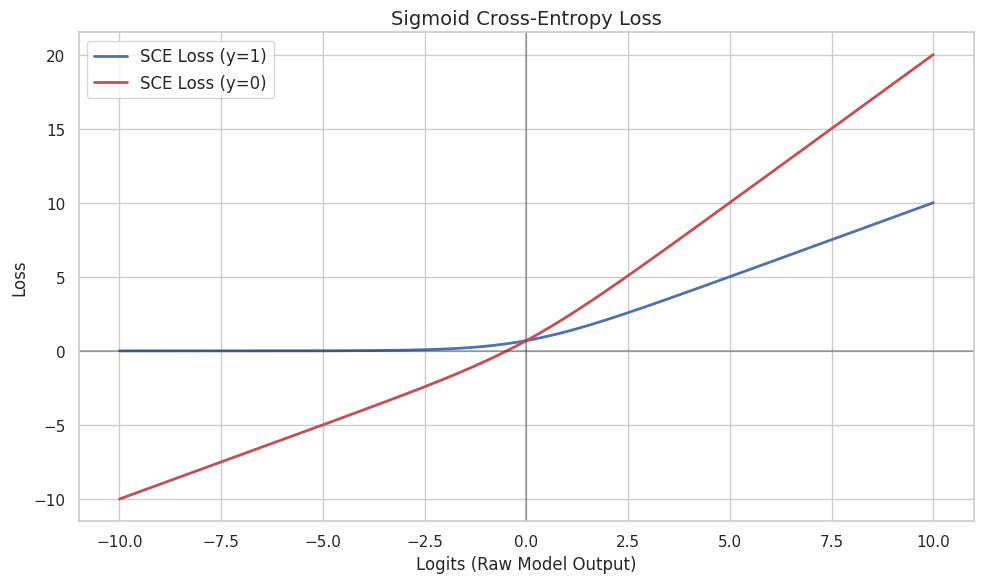

In [9]:
logits = np.linspace(-10, 10, 1000)  # Model outputs (pre-sigmoid)
y_true_1 = np.ones_like(logits)  # True label = 1
y_true_0 = np.zeros_like(logits)  # True label = 0

# Apply sigmoid to get probabilities
probs_from_logits = sigmoid(logits)

# Calculate sigmoid cross-entropy loss
def sigmoid_cross_entropy(logits, y):
    # Numerically stable version
    pos_term = np.maximum(0, logits) + np.log(1 + np.exp(-np.abs(logits)))
    neg_term = logits - logits * y
    return neg_term + pos_term

sce_true_1 = sigmoid_cross_entropy(logits, y_true_1)
sce_true_0 = sigmoid_cross_entropy(logits, y_true_0)

# Visualize sigmoid cross-entropy loss
plt.figure(figsize=(10, 6))
plt.plot(logits, sce_true_1, 'b-', linewidth=2, label='SCE Loss (y=1)')
plt.plot(logits, sce_true_0, 'r-', linewidth=2, label='SCE Loss (y=0)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Logits (Raw Model Output)', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Sigmoid Cross-Entropy Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


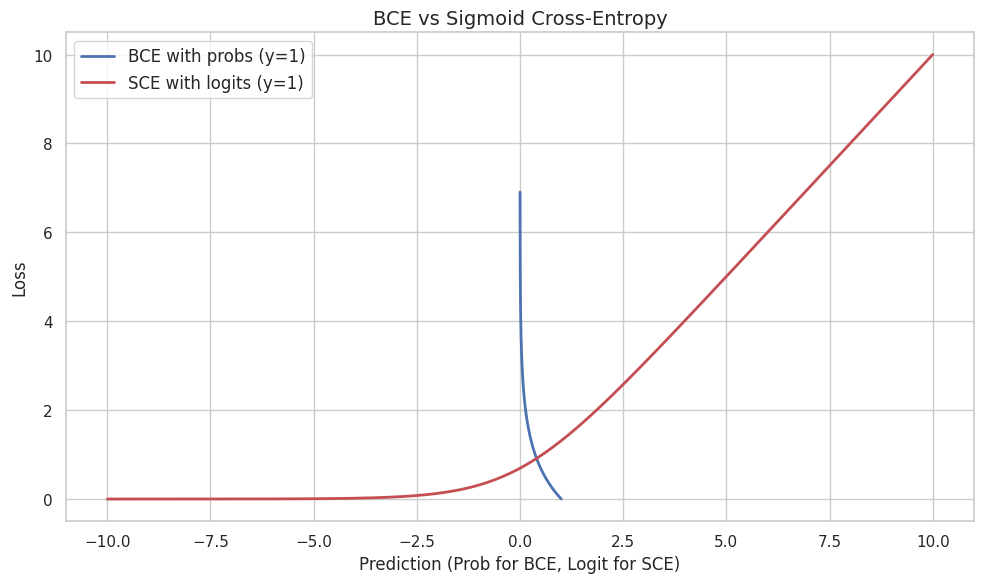

In [10]:
# Compare BCE (with probabilities) vs SCE (with logits)
plt.figure(figsize=(10, 6))
plt.plot(probs, bce_true_1, 'b-', linewidth=2, label='BCE with probs (y=1)')
plt.plot(logits, sce_true_1, 'r-', linewidth=2, label='SCE with logits (y=1)')
plt.xlabel('Prediction (Prob for BCE, Logit for SCE)', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('BCE vs Sigmoid Cross-Entropy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Softmax Cross-Entropy Loss

- Softmax Cross-Entropy Loss
- Used for multi-class classification problems.
- Combines softmax activation and cross-entropy loss.


Sample logits:
[[ 0.13305323  0.39383117  0.19567011]
 [-0.55288635 -0.56294884  1.2788562 ]
 [-1.00859995 -0.40214793  1.24806263]
 [ 0.44802595  2.17742731  0.49209398]
 [ 0.67638686 -0.55895929  0.05334969]]

Softmax probabilities:
[[0.29739261 0.38599759 0.31660979]
 [0.12143664 0.12022081 0.75834255]
 [0.08074236 0.14807447 0.77118317]
 [0.13016881 0.73379782 0.13603337]
 [0.54733124 0.15912786 0.29354091]]

True labels (one-hot):
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]

Softmax cross-entropy loss for each sample:
[0.95192414 2.11842512 0.25982936 2.0389231  0.60270111]

Mean loss: 1.194360566318806


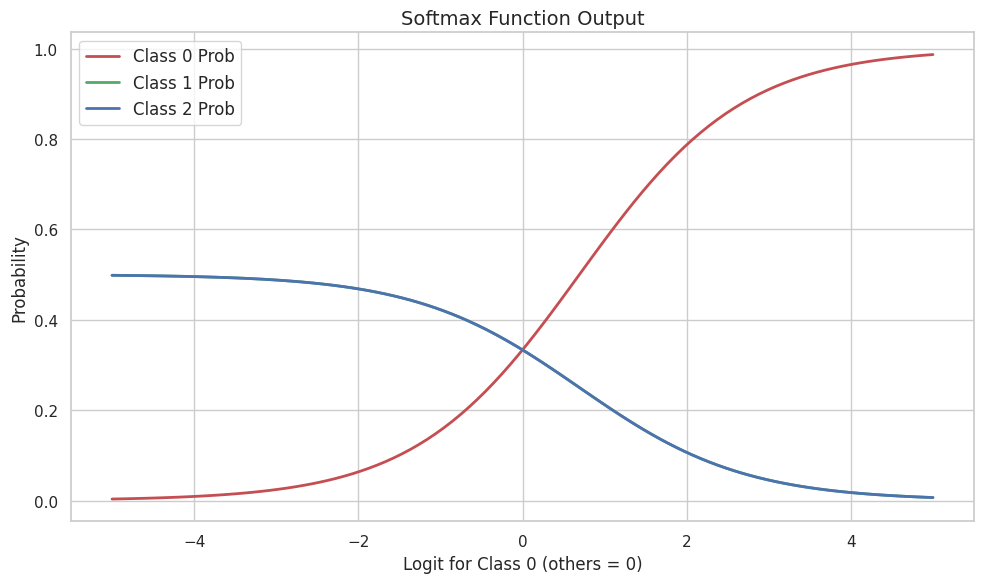

In [11]:
# Example of calculating softmax cross-entropy loss for a 3-class problem
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Generate sample data
n_samples = 5
n_classes = 3
logits = np.random.randn(n_samples, n_classes)
true_labels = np.random.randint(0, n_classes, size=n_samples)

# Convert to one-hot encoding
y_true_one_hot = np.zeros((n_samples, n_classes))
for i in range(n_samples):
    y_true_one_hot[i, true_labels[i]] = 1

# Calculate softmax probabilities
probs = softmax(logits)

# Calculate cross-entropy loss
def softmax_cross_entropy(probs, y_true):
    return -np.sum(y_true * np.log(probs + 1e-10), axis=1)

sce_loss = softmax_cross_entropy(probs, y_true_one_hot)

# Display the results
print("Sample logits:")
print(logits)
print("\nSoftmax probabilities:")
print(probs)
print("\nTrue labels (one-hot):")
print(y_true_one_hot)
print("\nSoftmax cross-entropy loss for each sample:")
print(sce_loss)
print("\nMean loss:", np.mean(sce_loss))

# Visualize softmax output for a 3-class example
# For visualization purposes, create a 1D slice through the 3D space
t = np.linspace(-5, 5, 100)
x_axis = t
points = np.zeros((len(t), 3))

for i, val in enumerate(t):
    points[i] = [val, 0, 0]  # Varying first logit, others fixed at 0

probs_vis = softmax(points)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, probs_vis[:, 0], 'r-', linewidth=2, label='Class 0 Prob')
plt.plot(x_axis, probs_vis[:, 1], 'g-', linewidth=2, label='Class 1 Prob')
plt.plot(x_axis, probs_vis[:, 2], 'b-', linewidth=2, label='Class 2 Prob')
plt.xlabel('Logit for Class 0 (others = 0)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Softmax Function Output', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

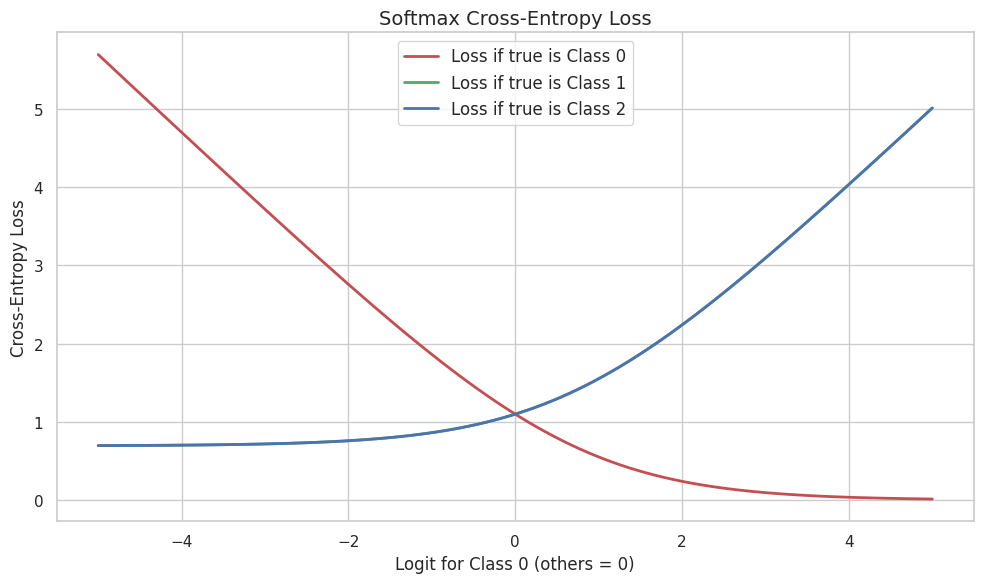

In [12]:
# Visualize how softmax cross-entropy loss changes as one logit varies
losses_class0 = []
losses_class1 = []
losses_class2 = []

for val in t:
    logit = [val, 0, 0]  # Varying first logit, others fixed at 0
    prob = softmax(np.array([logit]))[0]

    # Calculate loss for each possible true class
    loss_class0 = -np.log(prob[0] + 1e-10)
    loss_class1 = -np.log(prob[1] + 1e-10)
    loss_class2 = -np.log(prob[2] + 1e-10)

    losses_class0.append(loss_class0)
    losses_class1.append(loss_class1)
    losses_class2.append(loss_class2)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, losses_class0, 'r-', linewidth=2, label='Loss if true is Class 0')
plt.plot(x_axis, losses_class1, 'g-', linewidth=2, label='Loss if true is Class 1')
plt.plot(x_axis, losses_class2, 'b-', linewidth=2, label='Loss if true is Class 2')
plt.xlabel('Logit for Class 0 (others = 0)', fontsize=12)
plt.ylabel('Cross-Entropy Loss', fontsize=12)
plt.title('Softmax Cross-Entropy Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. Focal Loss

- Extension of cross-entropy loss that addresses class imbalance by
- down-weighting the loss assigned to well-classified examples.
- FL(p_t) = -α(1-p_t)^γ * log(p_t)
- where p_t is the probability of the true class

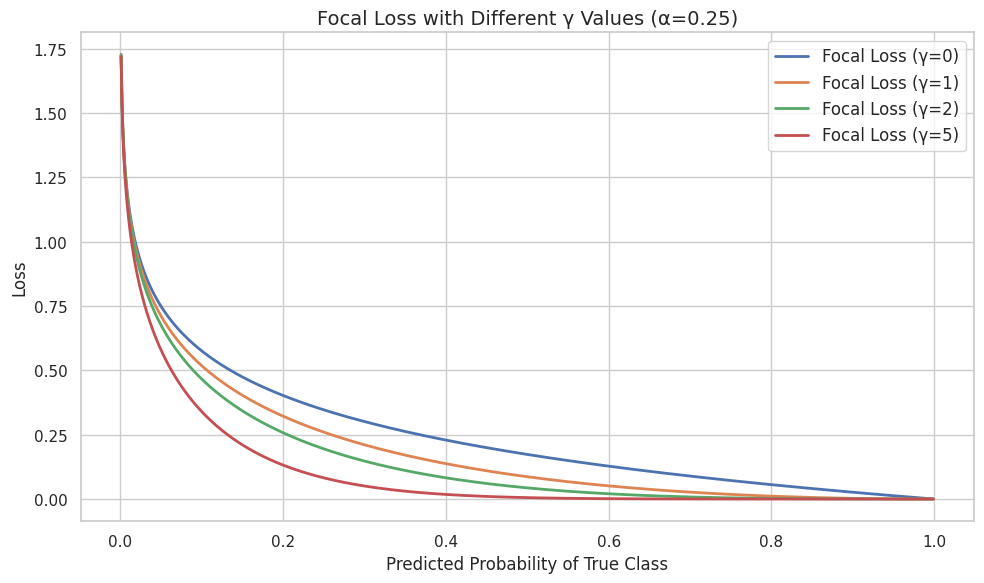

In [13]:
def focal_loss(p, y, gamma=2.0, alpha=0.25):
    p_t = p * y + (1 - p) * (1 - y)  # p_t is prob of correct class
    alpha_t = alpha * y + (1 - alpha) * (1 - y)
    focal_factor = (1 - p_t) ** gamma
    return -alpha_t * focal_factor * np.log(p_t + 1e-10)

# Calculate focal loss for different gamma values
gammas = [0, 1, 2, 5]  # gamma=0 is equivalent to CE loss
probs = np.linspace(0.001, 0.999, 1000)
y_true = np.ones_like(probs)  # True label = 1

plt.figure(figsize=(10, 6))

for gamma in gammas:
    fl = focal_loss(probs, y_true, gamma=gamma)
    plt.plot(probs, fl, linewidth=2, label=f'Focal Loss (γ={gamma})')

plt.xlabel('Predicted Probability of True Class', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Focal Loss with Different γ Values (α=0.25)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## 8. Kullback-Leibler Divergence (KL Divergence)

- KL Divergence
- Measures how one probability distribution diverges from another.
- In ML, often used when training VAEs and comparing distributions.
- KL(P||Q) = Σ P(x) * log(P(x)/Q(x))


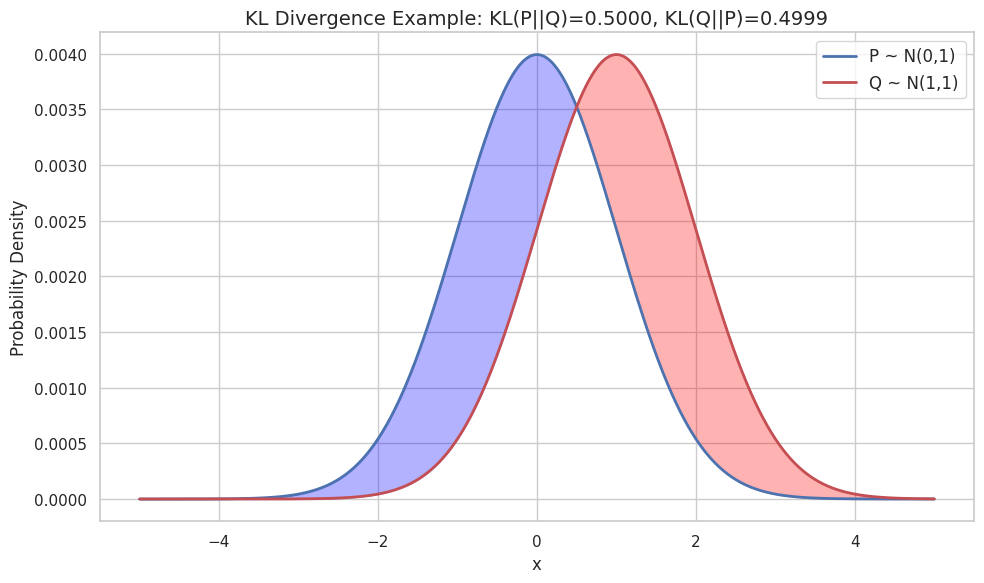

In [14]:
def kl_divergence(p, q):
    return np.sum(p * np.log(p / q + 1e-10))

# Example distributions
x = np.linspace(-5, 5, 1000)
mu1, sigma1 = 0, 1  # Distribution P
mu2, sigma2 = 1, 1  # Distribution Q

p = 1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
q = 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp(-(x - mu2)**2 / (2 * sigma2**2))

# Normalize to ensure they're proper probability distributions
p = p / np.sum(p)
q = q / np.sum(q)

kl_pq = kl_divergence(p, q)
kl_qp = kl_divergence(q, p)

plt.figure(figsize=(10, 6))
plt.plot(x, p, 'b-', linewidth=2, label=f'P ~ N({mu1},{sigma1})')
plt.plot(x, q, 'r-', linewidth=2, label=f'Q ~ N({mu2},{sigma2})')
plt.fill_between(x, p, q, where=(p > q), color='blue', alpha=0.3, interpolate=True)
plt.fill_between(x, p, q, where=(p <= q), color='red', alpha=0.3, interpolate=True)
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title(f'KL Divergence Example: KL(P||Q)={kl_pq:.4f}, KL(Q||P)={kl_qp:.4f}', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

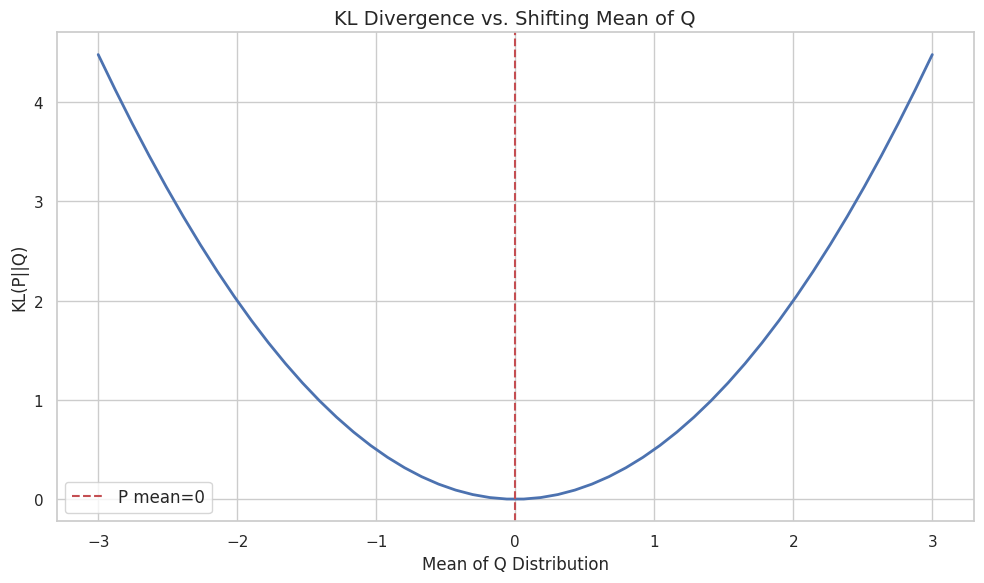

In [15]:
# Visualize KL divergence with shifting means
means = np.linspace(-3, 3, 50)
kl_divs = []

for m in means:
    q_temp = 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp(-(x - m)**2 / (2 * sigma2**2))
    q_temp = q_temp / np.sum(q_temp)  # Normalize
    kl_divs.append(kl_divergence(p, q_temp))

plt.figure(figsize=(10, 6))
plt.plot(means, kl_divs, 'b-', linewidth=2)
plt.axvline(x=mu1, color='r', linestyle='--', label=f'P mean={mu1}')
plt.xlabel('Mean of Q Distribution', fontsize=12)
plt.ylabel('KL(P||Q)', fontsize=12)
plt.title('KL Divergence vs. Shifting Mean of Q', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## 9. Dice Loss

-  Dice Loss
- Commonly used in image segmentation tasks, especially for medical images.
- Based on Dice coefficient (F1 score) which measures overlap between two sets.
- DL = 1 - (2*TP)/(2*TP + FP + FN)


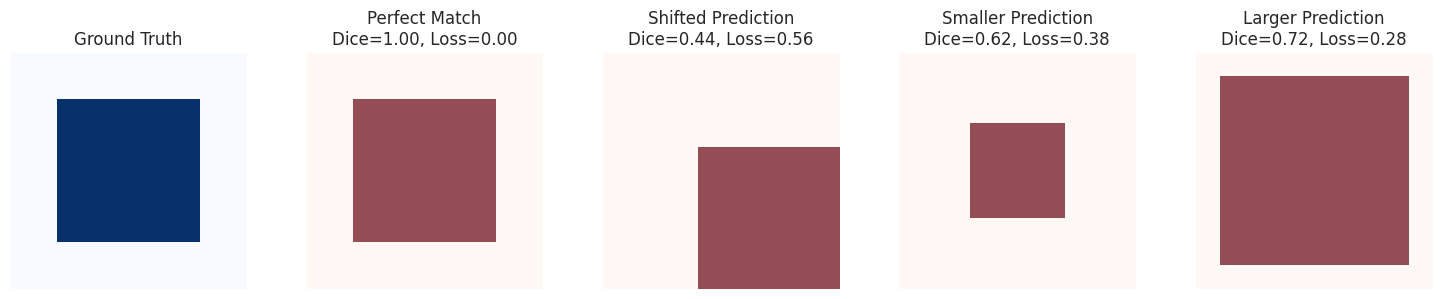

In [16]:
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-10)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

# Create example prediction vs ground truth
size = 10
y_true = np.zeros((size, size))
y_true[2:8, 2:8] = 1  # Ground truth is a square

# Create various predictions with different levels of overlap
y_pred_perfect = y_true.copy()  # Perfect prediction
y_pred_shifted = np.zeros((size, size))
y_pred_shifted[4:10, 4:10] = 1  # Shifted prediction
y_pred_smaller = np.zeros((size, size))
y_pred_smaller[3:7, 3:7] = 1  # Smaller prediction
y_pred_larger = np.zeros((size, size))
y_pred_larger[1:9, 1:9] = 1  # Larger prediction

predictions = [
    ("Perfect Match", y_pred_perfect),
    ("Shifted Prediction", y_pred_shifted),
    ("Smaller Prediction", y_pred_smaller),
    ("Larger Prediction", y_pred_larger)
]

# Visualize ground truth vs predictions
fig, axes = plt.subplots(1, len(predictions) + 1, figsize=(15, 3))
axes[0].imshow(y_true, cmap='Blues')
axes[0].set_title("Ground Truth")
axes[0].axis('off')

for i, (title, pred) in enumerate(predictions):
    dice = dice_coefficient(y_true, pred)
    loss = dice_loss(y_true, pred)
    axes[i+1].imshow(pred, cmap='Reds', alpha=0.7)
    axes[i+1].set_title(f"{title}\nDice={dice:.2f}, Loss={loss:.2f}")
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()
